In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.transforms as mtransforms
import matplotlib
from scipy.optimize import curve_fit
import json 
import tikzplotlib as tpl
from TN_utils import *

plt.rcParams['text.latex.preamble']=r"\usepackage{lmodern}"
#Options
params = {'text.usetex' : True,
          'font.size' : 10,
          'font.family' : 'lmodern',
          'text.latex.preamble' : r'\usepackage{amsmath}'
          }
plt.rcParams.update(params) 

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
def energy_spectrum(u, v, dx=None, n_bins=None):
    N = len(u)
    if dx is None:
        n = int(np.log2(N))
        dx = 1/(2**n-1)
    if n_bins is None:
        n_bins = N // 2
    u_f = np.fft.fft2(u) 
    v_f = np.fft.fft2(v) 
    kx = np.fft.fftfreq(N, d=dx) 
    ky = np.fft.fftfreq(N, d=dx) 
    kx_2d, ky_2d = np.meshgrid(kx, ky, indexing='ij')
    k = np.sqrt(kx_2d**2 + ky_2d**2)
    E_k = 0.5 * (np.abs(u_f)**2 + np.abs(v_f)**2)
    E_k_1 = 0.5 * np.abs(u_f)**2
    E_k_2 = 0.5 * np.abs(v_f)**2

    # Define the bins for radial summation
    bins = np.linspace(0, k.max(), n_bins)
    # bins = np.logspace(-1, int(np.log10(k.max())), n_bins)
    k_bin_centers = 0.5 * (bins[1:] + bins[:-1])
    bin_assignment = np.digitize(k.flatten(), bins, right=True)
    E_k_rad = np.bincount(bin_assignment, weights=E_k.flatten())[:-1]
    E_k_1_rad = np.bincount(bin_assignment, weights=E_k_1.flatten())[:-1]
    E_k_2_rad = np.bincount(bin_assignment, weights=E_k_2.flatten())[:-1]

    return k_bin_centers[1:], E_k_rad[1:], E_k_1_rad[1:], E_k_2_rad[1:]

In [3]:
def plot_energy_spectrum(u, v, dx=None, n_bins=None, chi=None, ylim=[1e-24, 1e12], xlim=[5e-1, 1e3]):
    k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
    k_bin_size = k_bin_centers[1] - k_bin_centers[0]
    print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
    fig = plt.figure(figsize=(7, 2.8))
    gs = fig.add_gridspec(1, 3)
    ax = gs.subplots(sharex=True, sharey=True)
    ax[0].loglog(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
    ax[1].loglog(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
    ax[2].loglog(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--')
    ax[2].loglog(k_bin_centers, k_bin_centers**-3*np.log(k_bin_centers)**(-1/3), marker='o', markersize=3, ls='--')

    # ax[2].loglog(k_bin_centers, k_bin_centers**(-5/3))

    ax[0].set_xlabel(r"Wave Number $\kappa$")
    ax[0].set_ylabel(r"Energy $E(\kappa)$")
    # ax[0].set_ylim(ylim)
    # ax[0].set_xlim(xlim)
    ax[0].grid(True, ls="--", c='0.7')
    ax[0].tick_params(which='both', direction="in")
    ax[1].set_xlabel(r"Wave Number $\kappa$")
    ax[1].tick_params(which='both', direction="in")
    # ax[1].set_ylabel(r"Energy $E(\kappa)$")
    # ax[1].set_ylim([1e-24, 1e12])
    # ax[1].set_xlim([5e-1, 1e3])
    ax[1].grid(True, ls="--", c='0.7')
    ax[2].set_xlabel(r"Wave Number $\kappa$")
    # ax[2].set_ylabel(r"Energy $E(\kappa)$")
    # ax[2].set_ylim([1e-24, 1e12])
    # ax[2].set_xlim([5e-1, 1e3])
    ax[2].grid(True, ls="--", c='0.7')
    ax[2].tick_params(which='both', direction="in")

    ax[0].set_title("x-component")
    ax[1].set_title("y-component")
    ax[2].set_title("both")
    if chi is not None:
        fig.suptitle(r"$\chi = $"+f"{chi}", fontsize=14)

    fig.tight_layout()
    plt.show()

In [4]:
def plot_from_file(path):
    X, Y, u, v = np.load(path, allow_pickle=True)
    plot_energy_spectrum(u, v)

Energy = 34834733292.139305
Energy = 545430857968.69183
Energy = 9793382776059.293
Energy = 9764207910024.941
Energy = 177694009311745.72


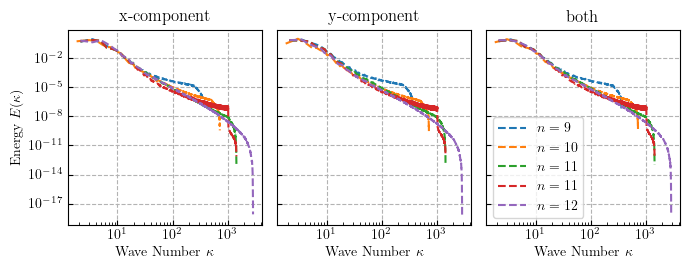

In [ ]:
dx = None
n_bins = None
chi = None
fig = plt.figure(figsize=(7, 2.8))
gs = fig.add_gridspec(1, 3)
ax = gs.subplots(sharex=True, sharey=True)

X, Y, u, v = np.load("DT/velocity_9_10000000.0_1.9921875000001854.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DT/mean_flow/mean_velocity_9_10000000.0.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.linalg.norm(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.linalg.norm(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.linalg.norm(E_k_rad), marker='', markersize=3, ls='--', label=r'$n=9$')

k_DT_n9 = k_bin_centers
E_k_DT_n9 = E_k_rad

X, Y, u, v = np.load("DT/velocity_10_10000000.0_1.992187500000319.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DT/mean_flow/mean_velocity_10_10000000.0.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins=600)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.linalg.norm(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.linalg.norm(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.linalg.norm(E_k_rad), marker='', markersize=3, ls='--', label=r'$n=10$')

k_DT_n10 = k_bin_centers
E_k_DT_n10 = E_k_rad

X, Y, u, v = np.load("DT/velocity_11_10000000.0_1.992187499999258.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DT/mean_flow/mean_velocity_11_10000000.0.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.linalg.norm(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.linalg.norm(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.linalg.norm(E_k_rad), marker='', markersize=3, ls='--', label=r'$n=11$')

k_DT_n11 = k_bin_centers
E_k_DT_n11 = E_k_rad

X, Y, u, v = np.load("DT/velocity_11_10000000.0_1.992187499999258.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DT/mean_flow/mean_velocity_11_10000000.0.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
u = numpy_SF_2D(numpy_MPS_2D(u, chi=20))
v = numpy_SF_2D(numpy_MPS_2D(v, chi=20))
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.linalg.norm(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.linalg.norm(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.linalg.norm(E_k_rad), marker='', markersize=3, ls='--', label=r'$n=11$')

k_DT_n11_20 = k_bin_centers
E_k_DT_n11_20 = E_k_rad

X, Y, u, v = np.load("DT/velocity_12_10000000.0_1.992187499998723.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DT/mean_flow/mean_velocity_12_10000000.0.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.linalg.norm(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.linalg.norm(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.linalg.norm(E_k_rad), marker='', markersize=3, ls='--', label=r'$n=12$')

k_DT_n12 = k_bin_centers
E_k_DT_n12 = E_k_rad

# X, Y, u, v = np.load("DT/velocity_12_10000000.0_1.992187499998723.npy", allow_pickle=True)
# k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
# k_bin_size = k_bin_centers[1] - k_bin_centers[0]
# print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
# ax[0].plot(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
# ax[1].plot(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
# ax[2].plot(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--', label=r'$n=12$')
# ax[2].loglog(k_bin_centers, k_bin_centers**-3*np.log(k_bin_centers)**(-1/3), marker='o', markersize=3, ls='--')

# ax[2].loglog(k_bin_centers, k_bin_centers**(-5/3))

ax[0].set_xlabel(r"Wave Number $\kappa$")
ax[0].set_ylabel(r"Energy $E(\kappa)$")
# ax[0].set_ylim(ylim)
# ax[0].set_xlim(xlim)
ax[0].grid(True, ls="--", c='0.7')
ax[0].tick_params(which='both', direction="in")
ax[1].set_xlabel(r"Wave Number $\kappa$")
ax[1].tick_params(which='both', direction="in")
# ax[1].set_ylabel(r"Energy $E(\kappa)$")
# ax[1].set_ylim([1e-24, 1e12])
# ax[1].set_xlim([5e-1, 1e3])
ax[1].grid(True, ls="--", c='0.7')
ax[2].set_xlabel(r"Wave Number $\kappa$")
# ax[2].set_ylabel(r"Energy $E(\kappa)$")
# ax[2].set_ylim([1e-24, 1e12])
# ax[2].set_xlim([5e-1, 1e3])
ax[2].grid(True, ls="--", c='0.7')
ax[2].tick_params(which='both', direction="in")
ax[2].legend()

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')

ax[0].set_title("x-component")
ax[1].set_title("y-component")
ax[2].set_title("both")
if chi is not None:
    fig.suptitle(r"$\chi = $"+f"{chi}", fontsize=14)

fig.tight_layout()
plt.show()

Energy = 1321305568.9358222
Energy = 28621529770.83764
Energy = 455704602647.9491
Energy = 7277519697985.348


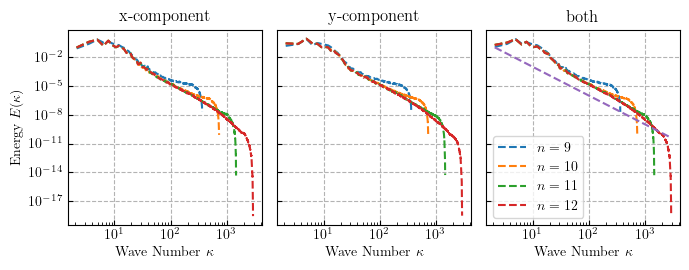

In [ ]:
dx = None
n_bins = None
chi = None
fig = plt.figure(figsize=(7, 2.8))
gs = fig.add_gridspec(1, 3)
ax = gs.subplots(sharex=True, sharey=True)

X, Y, u, v = np.load("DJ/velocity_9_10000000.0_1.9921875000001854.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DJ/mean_flow/mean_velocity_9_10000000.0.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.linalg.norm(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.linalg.norm(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.linalg.norm(E_k_rad), marker='', markersize=3, ls='--', label=r'$n=9$')

k_DJ_n9 = k_bin_centers
E_k_DJ_n9 = E_k_rad

X, Y, u, v = np.load("DJ/velocity_10_10000000.0_1.992187500000319.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DJ/mean_flow/mean_velocity_10_10000000.0.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.linalg.norm(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.linalg.norm(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.linalg.norm(E_k_rad), marker='', markersize=3, ls='--', label=r'$n=10$')

k_DJ_n10 = k_bin_centers
E_k_DJ_n10 = E_k_rad

X, Y, u, v = np.load("DJ/velocity_11_10000000.0_1.992187499999258.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DJ/mean_flow/mean_velocity_11_10000000.0.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.linalg.norm(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.linalg.norm(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.linalg.norm(E_k_rad), marker='', markersize=3, ls='--', label=r'$n=11$')

k_DJ_n11 = k_bin_centers
E_k_DJ_n11 = E_k_rad

X, Y, u, v = np.load("DJ/velocity_12_10000000.0_1.992187499998723.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DJ/mean_flow/mean_velocity_12_10000000.0.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.linalg.norm(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.linalg.norm(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.linalg.norm(E_k_rad), marker='', markersize=3, ls='--', label=r'$n=12$')

k_DJ_n12 = k_bin_centers
E_k_DJ_n12 = E_k_rad

# X, Y, u, v = np.load("DJ/velocity_12_500000.0_1.992187499998723.npy", allow_pickle=True)
# k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
# k_bin_size = k_bin_centers[1] - k_bin_centers[0]
# print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
# ax[0].plot(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
# ax[1].plot(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
# ax[2].plot(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--', label=r'$n=12$')
# ax[2].loglog(k_bin_centers, k_bin_centers**-3*np.log(k_bin_centers)**(-1/3), marker='', markersize=3, ls='--')
ax[2].loglog(k_bin_centers, k_bin_centers**-3, marker='', markersize=3, ls='--')

# ax[2].loglog(k_bin_centers, k_bin_centers**(-5/3))

ax[0].set_xlabel(r"Wave Number $\kappa$")
ax[0].set_ylabel(r"Energy $E(\kappa)$")
# ax[0].set_ylim(ylim)
# ax[0].set_xlim(xlim)
ax[0].grid(True, ls="--", c='0.7')
ax[0].tick_params(which='both', direction="in")
ax[1].set_xlabel(r"Wave Number $\kappa$")
ax[1].tick_params(which='both', direction="in")
# ax[1].set_ylabel(r"Energy $E(\kappa)$")
# ax[1].set_ylim([1e-24, 1e12])
# ax[1].set_xlim([5e-1, 1e3])
ax[1].grid(True, ls="--", c='0.7')
ax[2].set_xlabel(r"Wave Number $\kappa$")
# ax[2].set_ylabel(r"Energy $E(\kappa)$")
# ax[2].set_ylim([1e-24, 1e12])
# ax[2].set_xlim([5e-1, 1e3])
ax[2].grid(True, ls="--", c='0.7')
ax[2].tick_params(which='both', direction="in")
ax[2].legend()

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')

ax[0].set_title("x-component")
ax[1].set_title("y-component")
ax[2].set_title("both")
if chi is not None:
    fig.suptitle(r"$\chi = $"+f"{chi}", fontsize=14)

fig.tight_layout()
plt.show()

/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_14339/387173995.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


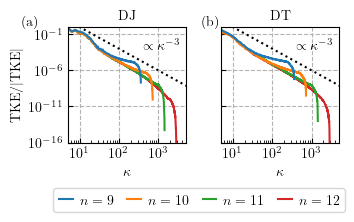

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(3.5, 1.5), sharey=True,  gridspec_kw={'wspace': 0.3})

x_min = 5e0
x_max = 5e3

# LEFT
ax[0].plot(k_DJ_n12, E_k_DJ_n12/np.linalg.norm(E_k_DJ_n12), marker='', ls='-', label=r"$n=12$", c=colors[3])
ax[0].plot(k_DJ_n11, E_k_DJ_n11/np.linalg.norm(E_k_DJ_n11), marker='', ls='-', label=r"$n=11$", c=colors[2])
ax[0].plot(k_DJ_n10, E_k_DJ_n10/np.linalg.norm(E_k_DJ_n10), marker='', ls='-', label=r"$n=10$", c=colors[1])
ax[0].plot(k_DJ_n9, E_k_DJ_n9/np.linalg.norm(E_k_DJ_n9), marker='', ls='-', label=r"$n=9$", c=colors[0])
ax[0].plot(np.logspace(0, 4, 100), 1e3*np.logspace(0, 4, 100)**-3, c="black", ls='dotted')
ax[0].set_xlabel(r"$\kappa$")
ax[0].set_ylabel(r"$\mathrm{TKE}/|\mathrm{TKE}|$")
ax[0].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[0].yaxis.grid(True, which="both", ls="--", c='0.7')
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0].text(-0.15, 0.9, "(a)", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
t = ax[0].text(0.871, 0.7, r"$\propto\kappa^{-3}$", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
# t.set_bbox(dict(facecolor='white', alpha=1, lw=0))
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].tick_params(which='both', direction="in")
ax[0].set_ylim([1e-16, 1e0])
ax[0].set_xlim([x_min, x_max])
ax[0].set_xticks([1e1, 1e2, 1e3])
ax[0].set_yticks([1e0, 1e-4, 1e-8, 1e-12, 1e-16])

# RIGHT
ax[1].plot(k_DT_n12, E_k_DT_n12/np.linalg.norm(E_k_DT_n12), marker='', ls='-', label=r"$n=12$", c=colors[3])
ax[1].plot(k_DT_n11, E_k_DT_n11/np.linalg.norm(E_k_DT_n11), marker='', ls='-', label=r"$n=11$", c=colors[2])
ax[1].plot(k_DT_n10, E_k_DT_n10/np.linalg.norm(E_k_DT_n10), marker='', ls='-', label=r"$n=10$", c=colors[1])
ax[1].plot(k_DT_n9, E_k_DT_n9/np.linalg.norm(E_k_DT_n9), marker='', ls='-', label=r"$n=9$", c=colors[0])
ax[1].plot(np.logspace(0, 4, 100), 1e3*np.logspace(0, 4, 100)**-3, c="black", ls='dotted')
ax[1].set_xlabel(r"$\kappa$")
# ax[1].set_ylabel(r"$E(\kappa)$")
ax[1].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[1].yaxis.grid(True, which="both", ls="--", c='0.7')
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[1].text(0.07, 0.9, "(b)", transform=ax[1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
t = ax[1].text(0.87, 0.7, r"$\propto\kappa^{-3}$", transform=ax[1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
# t.set_bbox(dict(facecolor='white', alpha=1, lw=0))
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].tick_params(which='both', direction="in")
ax[1].set_xlim([x_min, x_max])
ax[1].set_xticks([1e1, 1e2, 1e3])

ax[0].set_title(r"DJ", fontsize=10)
ax[1].set_title(r"DT", fontsize=10)

fig.legend(ax[0].get_legend_handles_labels()[0][::-1], ax[0].get_legend_handles_labels()[1][::-1], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fancybox=True, handlelength=1, handletextpad=0.5, columnspacing=1)
fig.tight_layout()

plt.savefig(f"grid_convergence.pdf", bbox_inches="tight")

In [8]:
# Truncated
X, Y, u, v = np.load("DJ/truncated/velocity_11_10000000_17/truncvelocity_11_10000000.0_1.992187499999258.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DJ/truncated/velocity_11_10000000_17/mean_truncvelocity_11_10000000.0_17.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DJ_n11_17 = k_bin_centers
E_k_DJ_n11_17 = E_k_rad

X, Y, u, v = np.load("DJ/truncated/velocity_11_10000000_72/truncvelocity_11_10000000.0_1.992187499999258.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DJ/truncated/velocity_11_10000000_72/mean_truncvelocity_11_10000000.0_72.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DJ_n11_72 = k_bin_centers
E_k_DJ_n11_72 = E_k_rad

X, Y, u, v = np.load("DT/truncated/velocity_11_10000000_20/truncvelocity_11_10000000.0_1.992187499999258.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DT/truncated/velocity_11_10000000_20/mean_truncvelocity_11_10000000.0_20.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DT_n11_20 = k_bin_centers
E_k_DT_n11_20 = E_k_rad

X, Y, u, v = np.load("DT/truncated/velocity_11_10000000_137/truncvelocity_11_10000000.0_1.992187499999258.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DT/truncated/velocity_11_10000000_137/mean_truncvelocity_11_10000000.0_137.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DT_n11_137 = k_bin_centers
E_k_DT_n11_137 = E_k_rad

Energy = 500217767961.32794
Energy = 501067832339.654
Energy = 10750790629882.94
Energy = 10780850779771.992


In [9]:
u_mps = np.load("DJ/QIS_DNS/data_11_72_10000000/u_time_1.99961.npy", allow_pickle=True)
v_mps = np.load("DJ/QIS_DNS/data_11_72_10000000/v_time_1.99961.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DJ/QIS_DNS/data_11_72_10000000/mean_velocity_11_72_10000000.0.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DJ_QIS_72 = k_bin_centers
E_k_DJ_QIS_72 = E_k_rad

u_mps = np.load("DJ/QIS_DNS/data_11_17_10000000/u_time_1.99219.npy", allow_pickle=True)
v_mps = np.load("DJ/QIS_DNS/data_11_17_10000000/v_time_1.99219.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DJ/QIS_DNS/data_11_17_10000000/mean_velocity_11_17_10000000.0.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DJ_QIS_17 = k_bin_centers
E_k_DJ_QIS_17 = E_k_rad

u_mps = np.load("DT/QIS_DNS/data_11_137_10000000/u_time_1.99961.npy", allow_pickle=True)
v_mps = np.load("DT/QIS_DNS/data_11_137_10000000/v_time_1.99961.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DT/QIS_DNS/data_11_137_10000000/mean_velocity_11_137_10000000.0.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DT_QIS_137 = k_bin_centers
E_k_DT_QIS_137 = E_k_rad

u_mps = np.load("DT/QIS_DNS/data_11_20_10000000/u_time_1.99219.npy", allow_pickle=True)
v_mps = np.load("DT/QIS_DNS/data_11_20_10000000/v_time_1.99219.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DT/QIS_DNS/data_11_20_10000000/mean_velocity_11_20_10000000.0.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DT_QIS_20 = k_bin_centers
E_k_DT_QIS_20 = E_k_rad

Energy = 4537215637962.47
Energy = 329256958556.93616
Energy = 3365287532091.738
Energy = 810098353815.2972


/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_14339/515606983.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


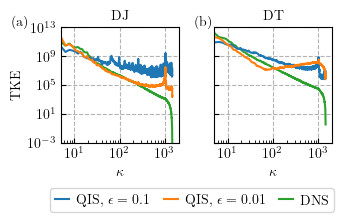

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(3.5, 1.5), sharey=True,  gridspec_kw={'wspace': 0.3})

x_min = 1e0
x_max = 1e4

# LEFT
ax[0].plot(k_DJ_n11, E_k_DJ_n11, marker='', ls='-', label=r"DNS", c=colors[2])
# ax[0].plot(k_DJ_n11_17, E_k_DJ_n11_17, marker='', ls='--', label=r"$chi$")
# ax[0].plot(k_DJ_n11_72, E_k_DJ_n11_72, marker='', ls='--', label=r"$chi$")
ax[0].plot(k_DJ_QIS_17, E_k_DJ_QIS_17, marker='', ls='-', label="QIS, " + r"$\epsilon=0.1$", c=colors[0])
ax[0].plot(k_DJ_QIS_72, E_k_DJ_QIS_72, marker='', ls='-', label="QIS, " + r"$\epsilon=0.01$", c=colors[1])
# ax[0].plot(k_DJ_n11_chi_only, E_k_DJ_n11_chi_only, marker='', ls='--', label=r"$chi only$")
# ax[0].plot(np.logspace(0, 4, 100), 1e3*np.logspace(0, 4, 100)**-3, c="black", ls='dotted')
ax[0].set_xlabel(r"$\kappa$")
ax[0].set_ylabel(r"TKE")
ax[0].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[0].yaxis.grid(True, which="both", ls="--", c='0.7')
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0].text(-0.18, 0.9, "(a)", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
# t = ax[0].text(0.871, 0.7, r"$\propto\kappa^{-3}$", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
# t.set_bbox(dict(facecolor='white', alpha=1, lw=0))
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].tick_params(which='both', direction="in")
ax[0].set_ylim([1e-3, 1e13])
ax[0].set_xlim([5e0, 2e3])
ax[0].set_xticks([1e1, 1e2, 1e3])
# ax[0].set_yticks([1e0, 1e-4, 1e-8, 1e-12, 1e-16])

# RIGHT
ax[1].plot(k_DT_n11, E_k_DT_n11, marker='', ls='-', label=r"DNS", c=colors[2])
# ax[1].plot(k_DT_n11_20, E_k_DT_n11_20, marker='', ls='--', label=r"$chi$")
# ax[1].plot(k_DT_n11_137, E_k_DT_n11_137, marker='', ls='--', label=r"$chi$")
ax[1].plot(k_DT_QIS_20, E_k_DT_QIS_20, marker='', ls='-', label="QIS\n" + r"$\epsilon=0.1$", c=colors[0])
ax[1].plot(k_DT_QIS_137, E_k_DT_QIS_137, marker='', ls='-', label="QIS\n" + r"$\epsilon=0.01$", c=colors[1])
# ax[1].plot(k_DT_n11_chi_only, E_k_DT_n11_chi_only, marker='', ls='--', label=r"$chi only$")
# ax[1].plot(np.logspace(0, 3, 100), 1e13*np.logspace(0, 3, 100)**-3, c="black", ls='dotted')
ax[1].set_xlabel(r"$\kappa$")
# ax[1].set_ylabel(r"$E(\kappa)$")
ax[1].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[1].yaxis.grid(True, which="both", ls="--", c='0.7')
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[1].text(0.07, 0.9, "(b)", transform=ax[1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
# t = ax[1].text(0.87, 0.7, r"$\propto\kappa^{-3}$", transform=ax[1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
# t.set_bbox(dict(facecolor='white', alpha=1, lw=0))
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].tick_params(which='both', direction="in")
ax[1].set_xlim([5e0, 2e3])
ax[1].set_xticks([1e1, 1e2, 1e3])

ax[0].set_title(r"DJ", fontsize=10)
ax[1].set_title(r"DT", fontsize=10)

fig.legend(np.roll(ax[0].get_legend_handles_labels()[0], -1), np.roll(ax[0].get_legend_handles_labels()[1], -1), loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fancybox=True, handlelength=1, handletextpad=0.5, columnspacing=1)
fig.tight_layout()

plt.savefig(f"E_k_QIS.pdf", bbox_inches="tight")

# Create TKE over time

Energy = 21136210136.060894
Energy = 240345421564.15613
Energy = 360870121518.3574
Energy = 455704602647.9491


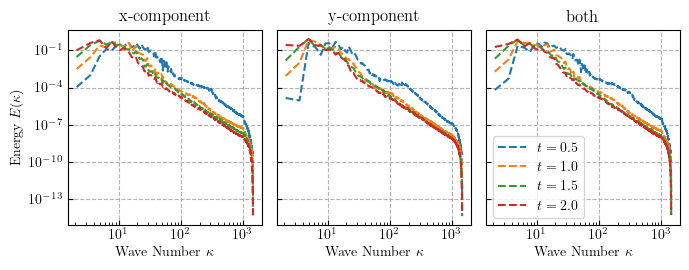

In [11]:
# DJ

dx = None
n_bins = None
chi = None
fig = plt.figure(figsize=(7, 2.8))
gs = fig.add_gridspec(1, 3)
ax = gs.subplots(sharex=True, sharey=True)

X, Y, u, v = np.load("DJ/velocity_11_10000000.0_0.49804687500004635.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DJ/mean_flow/mean_velocity_11_10000000.0_0.5.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.linalg.norm(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.linalg.norm(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.linalg.norm(E_k_rad), marker='', markersize=3, ls='--', label=r'$t=0.5$')

k_DJ_05 = k_bin_centers
E_k_DJ_05 = E_k_rad

X, Y, u, v = np.load("DJ/velocity_11_10000000.0_0.9960937500001595.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DJ/mean_flow/mean_velocity_11_10000000.0_1.0.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.linalg.norm(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.linalg.norm(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.linalg.norm(E_k_rad), marker='', markersize=3, ls='--', label=r'$t=1.0$')

k_DJ_10 = k_bin_centers
E_k_DJ_10 = E_k_rad

X, Y, u, v = np.load("DJ/velocity_11_10000000.0_1.494140624999711.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DJ/mean_flow/mean_velocity_11_10000000.0_1.5.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.linalg.norm(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.linalg.norm(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.linalg.norm(E_k_rad), marker='', markersize=3, ls='--', label=r'$t=1.5$')

k_DJ_15 = k_bin_centers
E_k_DJ_15 = E_k_rad

X, Y, u, v = np.load("DJ/velocity_11_10000000.0_1.992187499999258.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DJ/mean_flow/mean_velocity_11_10000000.0.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.linalg.norm(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.linalg.norm(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.linalg.norm(E_k_rad), marker='', markersize=3, ls='--', label=r'$t=2.0$')

k_DJ_20 = k_bin_centers
E_k_DJ_20 = E_k_rad

ax[0].set_xlabel(r"Wave Number $\kappa$")
ax[0].set_ylabel(r"Energy $E(\kappa)$")
# ax[0].set_ylim(ylim)
# ax[0].set_xlim(xlim)
ax[0].grid(True, ls="--", c='0.7')
ax[0].tick_params(which='both', direction="in")
ax[1].set_xlabel(r"Wave Number $\kappa$")
ax[1].tick_params(which='both', direction="in")
# ax[1].set_ylabel(r"Energy $E(\kappa)$")
# ax[1].set_ylim([1e-24, 1e12])
# ax[1].set_xlim([5e-1, 1e3])
ax[1].grid(True, ls="--", c='0.7')
ax[2].set_xlabel(r"Wave Number $\kappa$")
# ax[2].set_ylabel(r"Energy $E(\kappa)$")
# ax[2].set_ylim([1e-24, 1e12])
# ax[2].set_xlim([5e-1, 1e3])
ax[2].grid(True, ls="--", c='0.7')
ax[2].tick_params(which='both', direction="in")
ax[2].legend()

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')

ax[0].set_title("x-component")
ax[1].set_title("y-component")
ax[2].set_title("both")

fig.tight_layout()
plt.show()

Energy = 9960891687976.271
Energy = 9447517567936.008
Energy = 10713055992819.33
Energy = 9793382776059.293


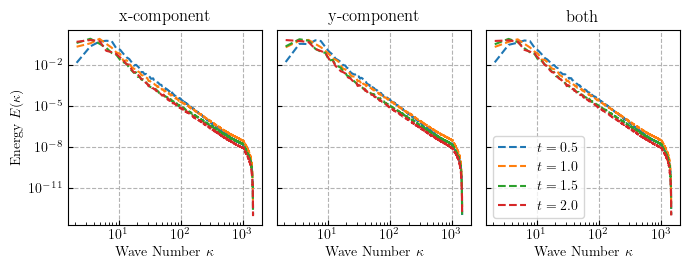

In [12]:
# DT

dx = None
n_bins = None
chi = None
fig = plt.figure(figsize=(7, 2.8))
gs = fig.add_gridspec(1, 3)
ax = gs.subplots(sharex=True, sharey=True)

X, Y, u, v = np.load("DT/velocity_11_10000000.0_0.49804687500004635.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DT/mean_flow/mean_velocity_11_10000000.0_0.5.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.linalg.norm(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.linalg.norm(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.linalg.norm(E_k_rad), marker='', markersize=3, ls='--', label=r'$t=0.5$')

k_DT_05 = k_bin_centers
E_k_DT_05 = E_k_rad

X, Y, u, v = np.load("DT/velocity_11_10000000.0_0.9960937500001595.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DT/mean_flow/mean_velocity_11_10000000.0_1.0.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.linalg.norm(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.linalg.norm(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.linalg.norm(E_k_rad), marker='', markersize=3, ls='--', label=r'$t=1.0$')

k_DT_10 = k_bin_centers
E_k_DT_10 = E_k_rad

X, Y, u, v = np.load("DT/velocity_11_10000000.0_1.494140624999711.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DT/mean_flow/mean_velocity_11_10000000.0_1.5.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.linalg.norm(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.linalg.norm(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.linalg.norm(E_k_rad), marker='', markersize=3, ls='--', label=r'$t=1.5$')

k_DT_15 = k_bin_centers
E_k_DT_15 = E_k_rad

X, Y, u, v = np.load("DT/velocity_11_10000000.0_1.992187499999258.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DT/mean_flow/mean_velocity_11_10000000.0.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.linalg.norm(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.linalg.norm(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.linalg.norm(E_k_rad), marker='', markersize=3, ls='--', label=r'$t=2.0$')

k_DT_20 = k_bin_centers
E_k_DT_20 = E_k_rad

ax[0].set_xlabel(r"Wave Number $\kappa$")
ax[0].set_ylabel(r"Energy $E(\kappa)$")
# ax[0].set_ylim(ylim)
# ax[0].set_xlim(xlim)
ax[0].grid(True, ls="--", c='0.7')
ax[0].tick_params(which='both', direction="in")
ax[1].set_xlabel(r"Wave Number $\kappa$")
ax[1].tick_params(which='both', direction="in")
# ax[1].set_ylabel(r"Energy $E(\kappa)$")
# ax[1].set_ylim([1e-24, 1e12])
# ax[1].set_xlim([5e-1, 1e3])
ax[1].grid(True, ls="--", c='0.7')
ax[2].set_xlabel(r"Wave Number $\kappa$")
# ax[2].set_ylabel(r"Energy $E(\kappa)$")
# ax[2].set_ylim([1e-24, 1e12])
# ax[2].set_xlim([5e-1, 1e3])
ax[2].grid(True, ls="--", c='0.7')
ax[2].tick_params(which='both', direction="in")
ax[2].legend()

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')

ax[0].set_title("x-component")
ax[1].set_title("y-component")
ax[2].set_title("both")

fig.tight_layout()
plt.show()

In [13]:
u_mps = np.load("DJ/QIS_DNS/data_11_72_10000000/u_time_0.49805.npy", allow_pickle=True)
v_mps = np.load("DJ/QIS_DNS/data_11_72_10000000/v_time_0.49805.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DJ/QIS_DNS/data_11_72_10000000/mean_velocity_11_72_10000000.0_0.5.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DJ_QIS_72_05 = k_bin_centers
E_k_DJ_QIS_72_05 = E_k_rad

u_mps = np.load("DJ/QIS_DNS/data_11_72_10000000/u_time_0.99609.npy", allow_pickle=True)
v_mps = np.load("DJ/QIS_DNS/data_11_72_10000000/v_time_0.99609.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DJ/QIS_DNS/data_11_72_10000000/mean_velocity_11_72_10000000.0_1.0.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DJ_QIS_72_10 = k_bin_centers
E_k_DJ_QIS_72_10 = E_k_rad

u_mps = np.load("DJ/QIS_DNS/data_11_72_10000000/u_time_1.49414.npy", allow_pickle=True)
v_mps = np.load("DJ/QIS_DNS/data_11_72_10000000/v_time_1.49414.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DJ/QIS_DNS/data_11_72_10000000/mean_velocity_11_72_10000000.0_1.5.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DJ_QIS_72_15 = k_bin_centers
E_k_DJ_QIS_72_15 = E_k_rad

u_mps = np.load("DJ/QIS_DNS/data_11_72_10000000/u_time_1.99961.npy", allow_pickle=True)
v_mps = np.load("DJ/QIS_DNS/data_11_72_10000000/v_time_1.99961.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DJ/QIS_DNS/data_11_72_10000000/mean_velocity_11_72_10000000.0.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DJ_QIS_72_20 = k_bin_centers
E_k_DJ_QIS_72_20 = E_k_rad

u_mps = np.load("DJ/QIS_DNS/data_11_17_10000000/u_time_0.49805.npy", allow_pickle=True)
v_mps = np.load("DJ/QIS_DNS/data_11_17_10000000/v_time_0.49805.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DJ/QIS_DNS/data_11_17_10000000/mean_velocity_11_17_10000000.0_0.5.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DJ_QIS_17_05 = k_bin_centers
E_k_DJ_QIS_17_05 = E_k_rad

u_mps = np.load("DJ/QIS_DNS/data_11_17_10000000/u_time_0.99609.npy", allow_pickle=True)
v_mps = np.load("DJ/QIS_DNS/data_11_17_10000000/v_time_0.99609.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DJ/QIS_DNS/data_11_17_10000000/mean_velocity_11_17_10000000.0_1.0.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DJ_QIS_17_10 = k_bin_centers
E_k_DJ_QIS_17_10 = E_k_rad

u_mps = np.load("DJ/QIS_DNS/data_11_17_10000000/u_time_1.49414.npy", allow_pickle=True)
v_mps = np.load("DJ/QIS_DNS/data_11_17_10000000/v_time_1.49414.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DJ/QIS_DNS/data_11_17_10000000/mean_velocity_11_17_10000000.0_1.5.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DJ_QIS_17_15 = k_bin_centers
E_k_DJ_QIS_17_15 = E_k_rad

u_mps = np.load("DJ/QIS_DNS/data_11_17_10000000/u_time_1.99219.npy", allow_pickle=True)
v_mps = np.load("DJ/QIS_DNS/data_11_17_10000000/v_time_1.99219.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DJ/QIS_DNS/data_11_17_10000000/mean_velocity_11_17_10000000.0.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DJ_QIS_17_20 = k_bin_centers
E_k_DJ_QIS_17_20 = E_k_rad

u_mps = np.load("DT/QIS_DNS/data_11_20_10000000/u_time_0.49805.npy", allow_pickle=True)
v_mps = np.load("DT/QIS_DNS/data_11_20_10000000/v_time_0.49805.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DT/QIS_DNS/data_11_20_10000000/mean_velocity_11_20_10000000.0_0.5.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DT_QIS_20_05 = k_bin_centers
E_k_DT_QIS_20_05 = E_k_rad

u_mps = np.load("DT/QIS_DNS/data_11_20_10000000/u_time_0.99609.npy", allow_pickle=True)
v_mps = np.load("DT/QIS_DNS/data_11_20_10000000/v_time_0.99609.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DT/QIS_DNS/data_11_20_10000000/mean_velocity_11_20_10000000.0_1.0.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DT_QIS_20_10 = k_bin_centers
E_k_DT_QIS_20_10 = E_k_rad

u_mps = np.load("DT/QIS_DNS/data_11_20_10000000/u_time_1.49414.npy", allow_pickle=True)
v_mps = np.load("DT/QIS_DNS/data_11_20_10000000/v_time_1.49414.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DT/QIS_DNS/data_11_20_10000000/mean_velocity_11_20_10000000.0_1.5.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DT_QIS_20_15 = k_bin_centers
E_k_DT_QIS_20_15 = E_k_rad

u_mps = np.load("DT/QIS_DNS/data_11_20_10000000/u_time_1.99219.npy", allow_pickle=True)
v_mps = np.load("DT/QIS_DNS/data_11_20_10000000/v_time_1.99219.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DT/QIS_DNS/data_11_20_10000000/mean_velocity_11_20_10000000.0.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DT_QIS_20_20 = k_bin_centers
E_k_DT_QIS_20_20 = E_k_rad

u_mps = np.load("DT/QIS_DNS/data_11_137_10000000/u_time_0.49805.npy", allow_pickle=True)
v_mps = np.load("DT/QIS_DNS/data_11_137_10000000/v_time_0.49805.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DT/QIS_DNS/data_11_137_10000000/mean_velocity_11_137_10000000.0_0.5.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DT_QIS_137_05 = k_bin_centers
E_k_DT_QIS_137_05 = E_k_rad

u_mps = np.load("DT/QIS_DNS/data_11_137_10000000/u_time_0.99756.npy", allow_pickle=True)
v_mps = np.load("DT/QIS_DNS/data_11_137_10000000/v_time_0.99756.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DT/QIS_DNS/data_11_137_10000000/mean_velocity_11_137_10000000.0_1.0.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DT_QIS_137_10 = k_bin_centers
E_k_DT_QIS_137_10 = E_k_rad

u_mps = np.load("DT/QIS_DNS/data_11_137_10000000/u_time_1.49414.npy", allow_pickle=True)
v_mps = np.load("DT/QIS_DNS/data_11_137_10000000/v_time_1.49414.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DT/QIS_DNS/data_11_137_10000000/mean_velocity_11_137_10000000.0_1.5.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DT_QIS_137_15 = k_bin_centers
E_k_DT_QIS_137_15 = E_k_rad

u_mps = np.load("DT/QIS_DNS/data_11_137_10000000/u_time_1.99961.npy", allow_pickle=True)
v_mps = np.load("DT/QIS_DNS/data_11_137_10000000/v_time_1.99961.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DT/QIS_DNS/data_11_137_10000000/mean_velocity_11_137_10000000.0.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DT_QIS_137_20 = k_bin_centers
E_k_DT_QIS_137_20 = E_k_rad

Energy = 18831113205.56953
Energy = 231759238428.77502
Energy = 278019020492.9648
Energy = 4537215637962.47
Energy = 20431789435.33744
Energy = 457742357520.459
Energy = 604183242361.3536
Energy = 329256958556.93616
Energy = 3223296351636.1504
Energy = 2056812810263.4841
Energy = 1208743644185.5972
Energy = 810098353815.2972
Energy = 4606438244607.01
Energy = 3694196677014.2354
Energy = 3339303591083.9404
Energy = 3365287532091.738


/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_14339/3043816901.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


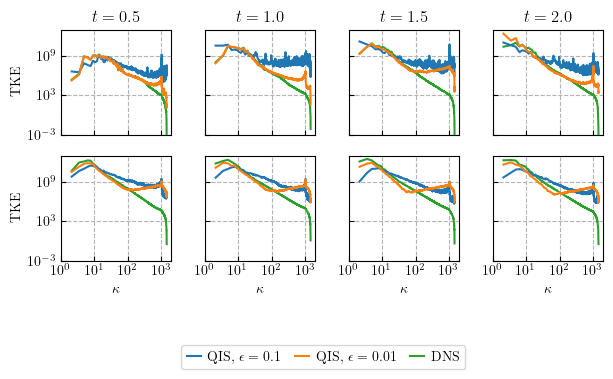

In [14]:
fig, ax = plt.subplots(2, 4, figsize=(7, 3), sharey=True, sharex=True, gridspec_kw={'wspace': 0.3})

x_min = 1e0
x_max = 1e4

ax[0, 0].plot(k_DJ_05, E_k_DJ_05, marker='', ls='-', label=r"DNS", c=colors[2])
ax[0, 0].plot(k_DJ_QIS_17_05, E_k_DJ_QIS_17_05, marker='', ls='-', label="QIS, " + r"$\epsilon=0.1$", c=colors[0])
ax[0, 0].plot(k_DJ_QIS_72_05, E_k_DJ_QIS_72_05, marker='', ls='-', label="QIS, " + r"$\epsilon=0.01$", c=colors[1])
ax[0, 0].set_ylabel(r"TKE")
ax[0, 0].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[0, 0].yaxis.grid(True, which="both", ls="--", c='0.7')
# trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
# ax[0, 0].text(-0.15, 0.9, "a)", transform=ax[0, 0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
ax[0, 0].set_yscale('log')
ax[0, 0].set_xscale('log')
ax[0, 0].tick_params(which='both', direction="in")
ax[0, 0].set_ylim([1e-3, 1e13])
ax[0, 0].set_xticks([1e0, 1e1, 1e2, 1e3])
ax[0, 0].set_title(r"$t=0.5$")

ax[0, 1].plot(k_DJ_10, E_k_DJ_10, marker='', ls='-', label=r"DNS", c=colors[2])
ax[0, 1].plot(k_DJ_QIS_17_10, E_k_DJ_QIS_17_10, marker='', ls='-', label="QIS, " + r"$\epsilon=0.1$", c=colors[0])
ax[0, 1].plot(k_DJ_QIS_72_10, E_k_DJ_QIS_72_10, marker='', ls='-', label="QIS, " + r"$\epsilon=0.01$", c=colors[1])
ax[0, 1].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[0, 1].yaxis.grid(True, which="both", ls="--", c='0.7')
# trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
# ax[0, 0].text(-0.15, 0.9, "a)", transform=ax[0, 0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
ax[0, 1].set_yscale('log')
ax[0, 1].set_xscale('log')
ax[0, 1].tick_params(which='both', direction="in")
ax[0, 1].set_ylim([1e-3, 1e13])
ax[0, 1].set_xticks([1e0, 1e1, 1e2, 1e3])
ax[0, 1].set_title(r"$t=1.0$")

ax[0, 2].plot(k_DJ_15, E_k_DJ_15, marker='', ls='-', label=r"DNS", c=colors[2])
ax[0, 2].plot(k_DJ_QIS_17_15, E_k_DJ_QIS_17_15, marker='', ls='-', label="QIS, " + r"$\epsilon=0.1$", c=colors[0])
ax[0, 2].plot(k_DJ_QIS_72_15, E_k_DJ_QIS_72_15, marker='', ls='-', label="QIS, " + r"$\epsilon=0.01$", c=colors[1])
ax[0, 2].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[0, 2].yaxis.grid(True, which="both", ls="--", c='0.7')
# trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
# ax[0, 0].text(-0.15, 0.9, "a)", transform=ax[0, 0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
ax[0, 2].set_yscale('log')
ax[0, 2].set_xscale('log')
ax[0, 2].tick_params(which='both', direction="in")
ax[0, 2].set_ylim([1e-3, 1e13])
ax[0, 2].set_xticks([1e0, 1e1, 1e2, 1e3])
ax[0, 2].set_title(r"$t=1.5$")

ax[0, 3].plot(k_DJ_20, E_k_DJ_20, marker='', ls='-', label=r"DNS", c=colors[2])
ax[0, 3].plot(k_DJ_QIS_17_20, E_k_DJ_QIS_17_20, marker='', ls='-', label="QIS, " + r"$\epsilon=0.1$", c=colors[0])
ax[0, 3].plot(k_DJ_QIS_72_20, E_k_DJ_QIS_72_20, marker='', ls='-', label="QIS, " + r"$\epsilon=0.01$", c=colors[1])
ax[0, 3].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[0, 3].yaxis.grid(True, which="both", ls="--", c='0.7')
# trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
# ax[0, 0].text(-0.15, 0.9, "a)", transform=ax[0, 0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
ax[0, 3].set_yscale('log')
ax[0, 3].set_xscale('log')
ax[0, 3].tick_params(which='both', direction="in")
ax[0, 3].set_ylim([1e-3, 1e13])
ax[0, 3].set_xticks([1e0, 1e1, 1e2, 1e3])
ax[0, 3].set_title(r"$t=2.0$")

ax[1, 0].plot(k_DT_05, E_k_DT_05, marker='', ls='-', label=r"DNS", c=colors[2])
ax[1, 0].plot(k_DT_QIS_20_05, E_k_DT_QIS_20_05, marker='', ls='-', label="QIS\n" + r"$\epsilon=0.1$", c=colors[0])
ax[1, 0].plot(k_DT_QIS_137_05, E_k_DT_QIS_137_05, marker='', ls='-', label="QIS\n" + r"$\epsilon=0.01$", c=colors[1])
ax[1, 0].set_ylabel(r"TKE")
ax[1, 0].set_xlabel(r"$\kappa$")
ax[1, 0].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[1, 0].yaxis.grid(True, which="both", ls="--", c='0.7')
# trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
# ax[1, 0].text(-0.15, 0.9, "b)", transform=ax[1, 0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
ax[1, 0].set_yscale('log')
ax[1, 0].set_xscale('log')
ax[1, 0].tick_params(which='both', direction="in")
ax[1, 0].set_xticks([1e0, 1e1, 1e2, 1e3])

ax[1, 1].plot(k_DT_10, E_k_DT_10, marker='', ls='-', label=r"DNS", c=colors[2])
ax[1, 1].plot(k_DT_QIS_20_10, E_k_DT_QIS_20_10, marker='', ls='-', label="QIS\n" + r"$\epsilon=0.1$", c=colors[0])
ax[1, 1].plot(k_DT_QIS_137_10, E_k_DT_QIS_137_10, marker='', ls='-', label="QIS\n" + r"$\epsilon=0.01$", c=colors[1])
ax[1, 1].set_xlabel(r"$\kappa$")
ax[1, 1].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[1, 1].yaxis.grid(True, which="both", ls="--", c='0.7')
# trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
# ax[1, 0].text(-0.15, 0.9, "b)", transform=ax[1, 0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
ax[1, 1].set_yscale('log')
ax[1, 1].set_xscale('log')
ax[1, 1].tick_params(which='both', direction="in")
ax[1, 1].set_xticks([1e0, 1e1, 1e2, 1e3])

ax[1, 2].plot(k_DT_15, E_k_DT_15, marker='', ls='-', label=r"DNS", c=colors[2])
ax[1, 2].plot(k_DT_QIS_20_15, E_k_DT_QIS_20_15, marker='', ls='-', label="QIS\n" + r"$\epsilon=0.1$", c=colors[0])
ax[1, 2].plot(k_DT_QIS_137_15, E_k_DT_QIS_137_15, marker='', ls='-', label="QIS\n" + r"$\epsilon=0.01$", c=colors[1])
ax[1, 2].set_xlabel(r"$\kappa$")
ax[1, 2].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[1, 2].yaxis.grid(True, which="both", ls="--", c='0.7')
# trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
# ax[1, 0].text(-0.15, 0.9, "b)", transform=ax[1, 0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
ax[1, 2].set_yscale('log')
ax[1, 2].set_xscale('log')
ax[1, 2].tick_params(which='both', direction="in")
ax[1, 2].set_xticks([1e0, 1e1, 1e2, 1e3])

ax[1, 3].plot(k_DT_20, E_k_DT_20, marker='', ls='-', label=r"DNS", c=colors[2])
ax[1, 3].plot(k_DT_QIS_20_20, E_k_DT_QIS_20_20, marker='', ls='-', label="QIS\n" + r"$\epsilon=0.1$", c=colors[0])
ax[1, 3].plot(k_DT_QIS_137_20, E_k_DT_QIS_137_20, marker='', ls='-', label="QIS\n" + r"$\epsilon=0.01$", c=colors[1])
ax[1, 3].set_xlabel(r"$\kappa$")
ax[1, 3].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[1, 3].yaxis.grid(True, which="both", ls="--", c='0.7')
# trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
# ax[1, 0].text(-0.15, 0.9, "b)", transform=ax[1, 0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
ax[1, 3].set_yscale('log')
ax[1, 3].set_xscale('log')
ax[1, 3].tick_params(which='both', direction="in")
ax[1, 3].set_xticks([1e0, 1e1, 1e2, 1e3])

# ax[0].set_title(r"DJ", fontsize=10)
# ax[1].set_title(r"DT", fontsize=10)

fig.legend(np.roll(ax[0, 0].get_legend_handles_labels()[0], -1), np.roll(ax[0, 0].get_legend_handles_labels()[1], -1), loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fancybox=True, handlelength=1, handletextpad=0.5, columnspacing=1)
fig.tight_layout()

plt.savefig(f"E_k_QIS_t.pdf", bbox_inches="tight")

# TKE for low Re

In [15]:
X, Y, u, v = np.load("DT/velocity_10_2000_1.992187500000319.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DT/mean_flow/mean_velocity_10_2000.0.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DT_n10 = k_bin_centers
E_k_DT_n10 = E_k_rad

X, Y, u, v = np.load("DJ/velocity_10_200000_1.992187500000319.npy", allow_pickle=True)
X, Y, u_mean, v_mean = np.load("DJ/mean_flow/mean_velocity_10_200000.0.npy", allow_pickle=True)
u = u - u_mean.T
v = v - v_mean.T
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DJ_n10 = k_bin_centers
E_k_DJ_n10 = E_k_rad

Energy = 63803352989.64633
Energy = 27140055282.55226


In [16]:
u_mps = np.load("DT/QIS_DNS/data_10_28_2000/u_time_1.99219.npy", allow_pickle=True)
v_mps = np.load("DT/QIS_DNS/data_10_28_2000/v_time_1.99219.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DT/QIS_DNS/data_10_28_2000/mean_velocity_10_28_2000.0.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DT_QIS_n10_28 = k_bin_centers
E_k_DT_QIS_n10_28 = E_k_rad

u_mps = np.load("DT/QIS_DNS/data_10_60_2000/u_time_1.99219.npy", allow_pickle=True)
v_mps = np.load("DT/QIS_DNS/data_10_60_2000/v_time_1.99219.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DT/QIS_DNS/data_10_60_2000/mean_velocity_10_60_2000.0.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DT_QIS_n10_60 = k_bin_centers
E_k_DT_QIS_n10_60 = E_k_rad

u_mps = np.load("DT/QIS_DNS/data_10_107_2000/u_time_1.99219.npy", allow_pickle=True)
v_mps = np.load("DT/QIS_DNS/data_10_107_2000/u_time_1.99219.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DT/QIS_DNS/data_10_107_2000/mean_velocity_10_107_2000.0.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DT_QIS_n10_107 = k_bin_centers
E_k_DT_QIS_n10_107 = E_k_rad

Energy = 20203685564.304176
Energy = 25113056897.7551
Energy = 32641209453.029987


In [17]:
u_mps = np.load("DJ/QIS_DNS/data_10_16_200000/u_time_1.99219.npy", allow_pickle=True)
v_mps = np.load("DJ/QIS_DNS/data_10_16_200000/v_time_1.99219.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DJ/QIS_DNS/data_10_16_200000/mean_velocity_10_16_200000.0.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DJ_QIS_n10_16 = k_bin_centers
E_k_DJ_QIS_n10_16 = E_k_rad

u_mps = np.load("DJ/QIS_DNS/data_10_39_200000/u_time_1.99219.npy", allow_pickle=True)
v_mps = np.load("DJ/QIS_DNS/data_10_39_200000/u_time_1.99219.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DJ/QIS_DNS/data_10_39_200000/mean_velocity_10_39_200000.0.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DJ_QIS_n10_39 = k_bin_centers
E_k_DJ_QIS_n10_39 = E_k_rad

u_mps = np.load("DJ/QIS_DNS/data_10_112_200000/u_time_1.99219.npy", allow_pickle=True)
v_mps = np.load("DJ/QIS_DNS/data_10_112_200000/u_time_1.99219.npy", allow_pickle=True)
u = convert_to_SF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_SF2D(convert_numpy_to_MPS(v_mps))
u_mean, v_mean = np.load("DJ/QIS_DNS/data_10_112_200000/mean_velocity_10_112_200000.0.npy", allow_pickle=True)
u = u - u_mean
v = v - v_mean
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")

k_DJ_QIS_n10_112 = k_bin_centers
E_k_DJ_QIS_n10_112 = E_k_rad

Energy = 13351201204.82143
Energy = 116980572174.67282
Energy = 118066408966.81927


/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_14339/209004791.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


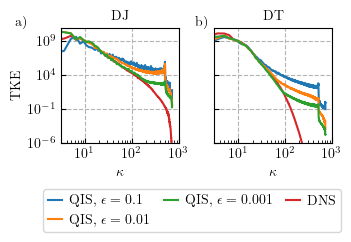

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(3.5, 1.5), sharey=True,  gridspec_kw={'wspace': 0.3})

x_min = 1e0
x_max = 1e4

# LEFT
ax[0].plot(k_DJ_n10, E_k_DJ_n10, marker='', ls='-', label=r"DNS", c=colors[3])
# ax[0].plot(k_DJ_n11_17, E_k_DJ_n11_17, marker='', ls='--', label=r"$chi$")
# ax[0].plot(k_DJ_n11_72, E_k_DJ_n11_72, marker='', ls='--', label=r"$chi$")
ax[0].plot(k_DJ_QIS_n10_16, E_k_DJ_QIS_n10_16, marker='', ls='-', label="QIS, " + r"$\epsilon=0.1$", c=colors[0])
ax[0].plot(k_DJ_QIS_n10_39, E_k_DJ_QIS_n10_39, marker='', ls='-', label="QIS, " + r"$\epsilon=0.01$", c=colors[1])
ax[0].plot(k_DJ_QIS_n10_112, E_k_DJ_QIS_n10_112, marker='', ls='-', label="QIS, " + r"$\epsilon=0.001$", c=colors[2])
# ax[0].plot(k_DJ_n11_chi_only, E_k_DJ_n11_chi_only, marker='', ls='--', label=r"$chi only$")
# ax[0].plot(np.logspace(0, 4, 100), 1e3*np.logspace(0, 4, 100)**-3, c="black", ls='dotted')
ax[0].set_xlabel(r"$\kappa$")
ax[0].set_ylabel(r"TKE")
ax[0].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[0].yaxis.grid(True, which="both", ls="--", c='0.7')
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0].text(-0.15, 0.9, "a)", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
# t = ax[0].text(0.871, 0.7, r"$\propto\kappa^{-3}$", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
# t.set_bbox(dict(facecolor='white', alpha=1, lw=0))
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].tick_params(which='both', direction="in")
ax[0].set_ylim([1e-6, 1e11])
ax[0].set_xlim([3e0, 1e3])
ax[0].set_xticks([1e1, 1e2, 1e3])
# ax[0].set_yticks([1e0, 1e-4, 1e-8, 1e-12, 1e-16])

# RIGHT
ax[1].plot(k_DT_n10, E_k_DT_n10, marker='', ls='-', label=r"DNS", c=colors[3])
# ax[1].plot(k_DT_n11_20, E_k_DT_n11_20, marker='', ls='--', label=r"$chi$")
# ax[1].plot(k_DT_n11_137, E_k_DT_n11_137, marker='', ls='--', label=r"$chi$")
ax[1].plot(k_DT_QIS_n10_28, E_k_DT_QIS_n10_28, marker='', ls='-', label="QIS\n" + r"$\epsilon=0.1$", c=colors[0])
ax[1].plot(k_DT_QIS_n10_60, E_k_DT_QIS_n10_60, marker='', ls='-', label="QIS\n" + r"$\epsilon=0.01$", c=colors[1])
ax[1].plot(k_DT_QIS_n10_107, E_k_DT_QIS_n10_107, marker='', ls='-', label="QIS\n" + r"$\epsilon=0.001$", c=colors[2])
# ax[1].plot(k_DT_n11_chi_only, E_k_DT_n11_chi_only, marker='', ls='--', label=r"$chi only$")
# ax[1].plot(np.logspace(0, 3, 100), 1e13*np.logspace(0, 3, 100)**-3, c="black", ls='dotted')
ax[1].set_xlabel(r"$\kappa$")
# ax[1].set_ylabel(r"$E(\kappa)$")
ax[1].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[1].yaxis.grid(True, which="both", ls="--", c='0.7')
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[1].text(0.07, 0.9, "b)", transform=ax[1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
# t = ax[1].text(0.87, 0.7, r"$\propto\kappa^{-3}$", transform=ax[1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
# t.set_bbox(dict(facecolor='white', alpha=1, lw=0))
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].tick_params(which='both', direction="in")
ax[1].set_xlim([3e0, 1e3])
ax[1].set_xticks([1e1, 1e2, 1e3])

ax[0].set_title(r"DJ", fontsize=10)
ax[1].set_title(r"DT", fontsize=10)

fig.legend(np.roll(ax[0].get_legend_handles_labels()[0], -1), np.roll(ax[0].get_legend_handles_labels()[1], -1), loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fancybox=True, handlelength=1, handletextpad=0.5, columnspacing=1)
fig.tight_layout()

plt.savefig(f"TKE_QIS_lowRe.pdf", bbox_inches="tight")

/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_14339/3364591907.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


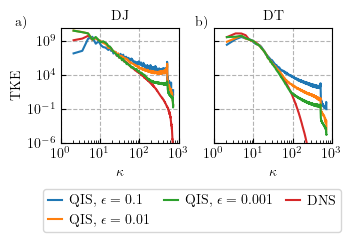

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(3.5, 1.5), sharey=True,  gridspec_kw={'wspace': 0.3})

x_min = 1e0
x_max = 1e4

# LEFT
ax[0].plot(k_DJ_n10, E_k_DJ_n10, marker='', ls='-', label=r"DNS", c=colors[3])
# ax[0].plot(k_DJ_n11_17, E_k_DJ_n11_17, marker='', ls='--', label=r"$chi$")
# ax[0].plot(k_DJ_n11_72, E_k_DJ_n11_72, marker='', ls='--', label=r"$chi$")
ax[0].plot(k_DJ_QIS_n10_16, E_k_DJ_QIS_n10_16, marker='', ls='-', label="QIS, " + r"$\epsilon=0.1$", c=colors[0])
ax[0].plot(k_DJ_QIS_n10_39, E_k_DJ_QIS_n10_39, marker='', ls='-', label="QIS, " + r"$\epsilon=0.01$", c=colors[1])
ax[0].plot(k_DJ_QIS_n10_112, E_k_DJ_QIS_n10_112, marker='', ls='-', label="QIS, " + r"$\epsilon=0.001$", c=colors[2])
# ax[0].plot(k_DJ_n11_chi_only, E_k_DJ_n11_chi_only, marker='', ls='--', label=r"$chi only$")
# ax[0].plot(np.logspace(0, 4, 100), 1e3*np.logspace(0, 4, 100)**-3, c="black", ls='dotted')
ax[0].set_xlabel(r"$\kappa$")
ax[0].set_ylabel(r"TKE")
ax[0].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[0].yaxis.grid(True, which="both", ls="--", c='0.7')
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0].text(-0.15, 0.9, "a)", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
# t = ax[0].text(0.871, 0.7, r"$\propto\kappa^{-3}$", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
# t.set_bbox(dict(facecolor='white', alpha=1, lw=0))
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].tick_params(which='both', direction="in")
ax[0].set_ylim([1e-6, 1e11])
ax[0].set_xticks([1e0, 1e1, 1e2, 1e3])
# ax[0].set_yticks([1e0, 1e-4, 1e-8, 1e-12, 1e-16])

# RIGHT
ax[1].plot(k_DT_n10, E_k_DT_n10, marker='', ls='-', label=r"DNS", c=colors[3])
# ax[1].plot(k_DT_n11_20, E_k_DT_n11_20, marker='', ls='--', label=r"$chi$")
# ax[1].plot(k_DT_n11_137, E_k_DT_n11_137, marker='', ls='--', label=r"$chi$")
ax[1].plot(k_DT_QIS_n10_28, E_k_DT_QIS_n10_28, marker='', ls='-', label="QIS\n" + r"$\epsilon=0.1$", c=colors[0])
ax[1].plot(k_DT_QIS_n10_60, E_k_DT_QIS_n10_60, marker='', ls='-', label="QIS\n" + r"$\epsilon=0.01$", c=colors[1])
ax[1].plot(k_DT_QIS_n10_107, E_k_DT_QIS_n10_107, marker='', ls='-', label="QIS\n" + r"$\epsilon=0.001$", c=colors[2])
# ax[1].plot(k_DT_n11_chi_only, E_k_DT_n11_chi_only, marker='', ls='--', label=r"$chi only$")
# ax[1].plot(np.logspace(0, 3, 100), 1e13*np.logspace(0, 3, 100)**-3, c="black", ls='dotted')
ax[1].set_xlabel(r"$\kappa$")
# ax[1].set_ylabel(r"$E(\kappa)$")
ax[1].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[1].yaxis.grid(True, which="both", ls="--", c='0.7')
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[1].text(0.07, 0.9, "b)", transform=ax[1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
# t = ax[1].text(0.87, 0.7, r"$\propto\kappa^{-3}$", transform=ax[1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
# t.set_bbox(dict(facecolor='white', alpha=1, lw=0))
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].tick_params(which='both', direction="in")
ax[1].set_xticks([1e0, 1e1, 1e2, 1e3])

ax[0].set_title(r"DJ", fontsize=10)
ax[1].set_title(r"DT", fontsize=10)

fig.legend(np.roll(ax[0].get_legend_handles_labels()[0], -1), np.roll(ax[0].get_legend_handles_labels()[1], -1), loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fancybox=True, handlelength=1, handletextpad=0.5, columnspacing=1)
fig.tight_layout()

plt.savefig(f"TKE_QIS_lowRe.pdf", bbox_inches="tight")

/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_14339/1719998893.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


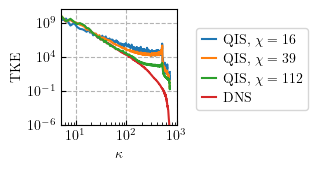

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(1.5, 1.5), sharey=True,  gridspec_kw={'wspace': 0.3, 'hspace': 0.3})

x_min = 1e0
x_max = 1e4

ax.plot(k_DJ_n10, E_k_DJ_n10, marker='', ls='-', label=r"DNS", c=colors[3])
ax.plot(k_DJ_QIS_n10_16, E_k_DJ_QIS_n10_16, marker='', ls='-', label=r"QIS, $\chi=16$", c=colors[0])
ax.plot(k_DJ_QIS_n10_39, E_k_DJ_QIS_n10_39, marker='', ls='-', label=r"QIS, $\chi=39$", c=colors[1])
ax.plot(k_DJ_QIS_n10_112, E_k_DJ_QIS_n10_112, marker='', ls='-', label=r"QIS, $\chi=112$", c=colors[2])
ax.set_xlabel(r"$\kappa$")
ax.set_ylabel(r"TKE")
ax.xaxis.grid(True, which="major", ls="--", c='0.7')
ax.yaxis.grid(True, which="major", ls="--", c='0.7')
# t = ax[0].text(0.871, 0.7, r"$\propto\kappa^{-3}$", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
# t.set_bbox(dict(facecolor='white', alpha=1, lw=0))
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(which='both', direction="in")
# ax.set_xticks([], minor=True)
ax.set_ylim([1e-6, 1e11])
ax.set_xlim([5e0, 1e3])
ax.set_xticks([1e1, 1e2, 1e3])
# ax[0].set_yticks([1e0, 1e-4, 1e-8, 1e-12, 1e-16])


# ax.set_title(r"DJ", fontsize=10)

fig.legend(np.roll(ax.get_legend_handles_labels()[0], -1), np.roll(ax.get_legend_handles_labels()[1], -1), loc='upper center', bbox_to_anchor=(1.4, 0.8), ncol=1, fancybox=True, handlelength=1, handletextpad=0.5, columnspacing=1)
fig.tight_layout()

plt.savefig(f"TKE_QIS_lowRe.pdf", bbox_inches="tight")